#Double 7's (Short Term Trading Strategies that Work)

    1. The SPY is above its 200-day moving average
    2. The SPY makes an intraday 7-day low, buy.
    3. If the SPY makes an intraday 7-day high, sell your long position.
    
    (optimize the number of days)

In [61]:
%matplotlib inline

Use future imports for python 3.0 forward compatibility

In [62]:
from __future__ import print_function
from __future__ import unicode_literals
from __future__ import division
from __future__ import absolute_import

Other imports

In [63]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import datetime
from talib.abstract import *
import pinkfish as pf
import strategy

# format price data
pd.options.display.float_format = '{:0.2f}'.format

# Double the DPI, so we are making 2x plots:
matplotlib.rcParams['savefig.dpi'] = 2 * matplotlib.rcParams['savefig.dpi']

Some global data

In [64]:
#symbol = '^GSPC'
symbol = 'SPY'
#symbol = 'DIA'
#symbol = 'QQQ'
#symbol = 'IWM'
#symbol = 'TLT'
#symbol = 'GLD'
#symbol = 'AAPL'
#symbol = 'BBRY'
#symbol = 'GDX'
capital = 100000
start = datetime.datetime(1900, 1, 1)
#end = datetime.datetime(1970, 12, 1)
#start = datetime.datetime(2015, 1, 1)
end = datetime.datetime.now()

Define high low trade periods

In [65]:
periods = range(3, 16)
periods = [str(period) for period in periods]

Run Strategy

In [66]:
strategies = pd.Series()
for period in periods:
    print("{0}".format(period), end=" ")
    strategies[period] = strategy.Strategy(symbol, capital, start, end, int(period))
    strategies[period].run()
    strategies[period].tlog, strategies[period].dbal = strategies[period].get_logs()
    strategies[period].stats = strategies[period].stats()

3 4 5 6 7 8 9 10 11 12 13 14 15 

Summarize results

In [67]:
metrics = ('annual_return_rate',
           'max_closed_out_drawdown',
           'drawdown_annualized_return',
           'drawdown_recovery',
           'best_month',
           'worst_month',
           'sharpe_ratio',
           'sortino_ratio',
           'monthly_std',
           'pct_time_in_market',
           'total_num_trades',
           'pct_profitable_trades',
           'avg_points')

df = strategy.summary(strategies, *metrics)
df

,3,4,5,6,7,8,9,10,11,12,13,14,15
annual_return_rate,3.88,5.35,7.99,8.30,7.71,7.03,6.93,7.01,6.18,5.92,5.41,4.87,4.67
max_closed_out_drawdown,-16.22,-19.84,-17.02,-20.02,-20.33,-18.44,-21.37,-19.82,-18.61,-16.61,-15.95,-16.26,-16.45
drawdown_annualized_return,-4.18,-3.71,-2.13,-2.41,-2.64,-2.62,-3.08,-2.83,-3.01,-2.81,-2.95,-3.34,-3.52
drawdown_recovery,-0.19,-1.64,-1.28,-1.28,-1.55,-1.55,-1.55,-1.68,-1.68,-1.28,-0.19,-1.74,-0.10
best_month,9.01,9.85,11.20,11.72,12.64,12.64,14.72,15.16,10.59,10.78,10.97,9.87,9.87
worst_month,-14.81,-14.62,-14.31,-13.47,-12.59,-12.62,-16.30,-16.30,-16.30,-16.30,-12.91,-12.91,-13.75
sharpe_ratio,0.41,0.53,0.76,0.80,0.75,0.69,0.68,0.68,0.62,0.59,0.55,0.51,0.49
sortino_ratio,0.37,0.49,0.69,0.70,0.64,0.58,0.57,0.56,0.49,0.47,0.44,0.39,0.37
monthly_std,2.06,2.07,2.10,2.13,2.18,2.23,2.32,2.35,2.28,2.30,2.25,2.15,2.17
pct_time_in_market,39.35,38.31,36.89,35.64,34.17,33.19,32.94,32.94,31.92,31.99,30.84,29.80,28.40


Bar graphs

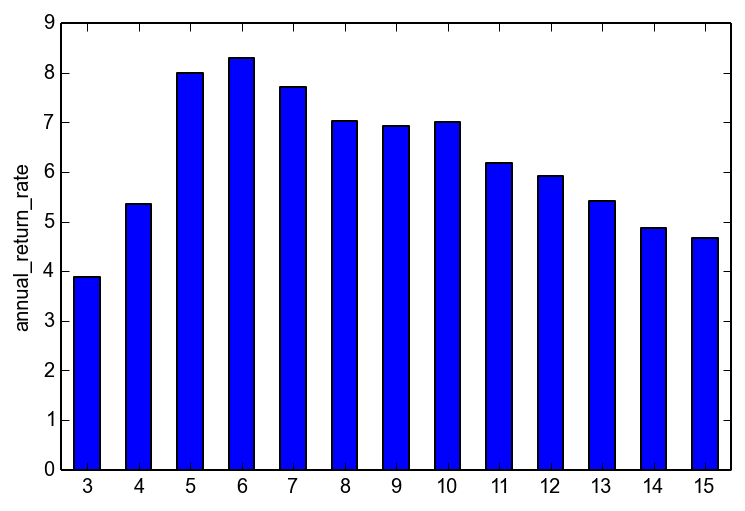

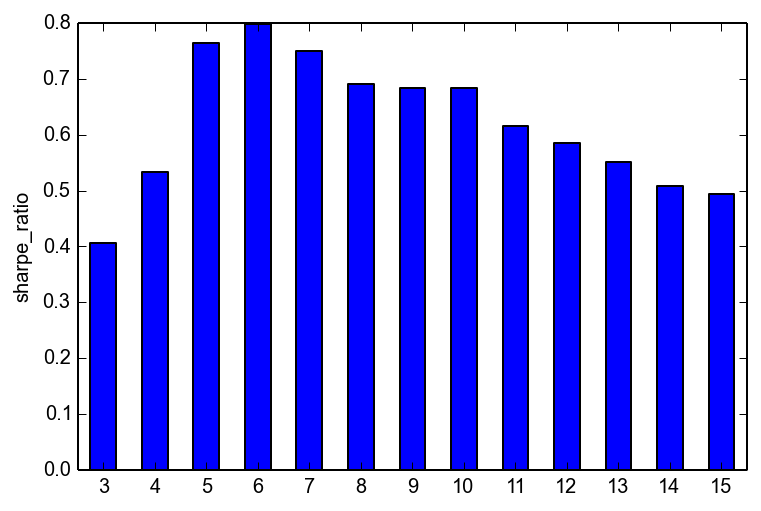

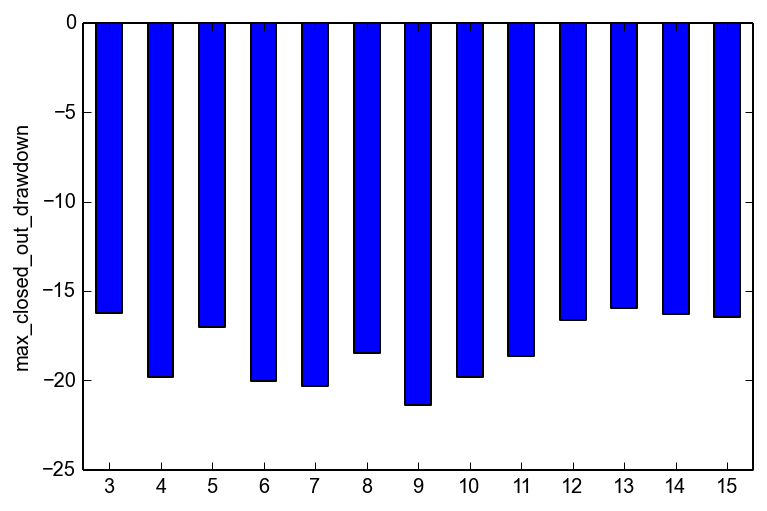

In [68]:
strategy.plot_bar_graph(df, 'annual_return_rate')
strategy.plot_bar_graph(df, 'sharpe_ratio')
strategy.plot_bar_graph(df, 'max_closed_out_drawdown')

Run Benchmark

In [69]:
s = strategies[periods[0]]
benchmark = pf.Benchmark(symbol, capital, s._start, s._end)
benchmark.run()
benchmark.tlog, benchmark.dbal = benchmark.get_logs()
benchmark.stats = benchmark.stats()

1993-11-12 00:00:00 BUY  3254 SPY @ 30.72
2016-05-12 00:00:00 SELL 3254.0 SPY @ 206.56


Equity curve

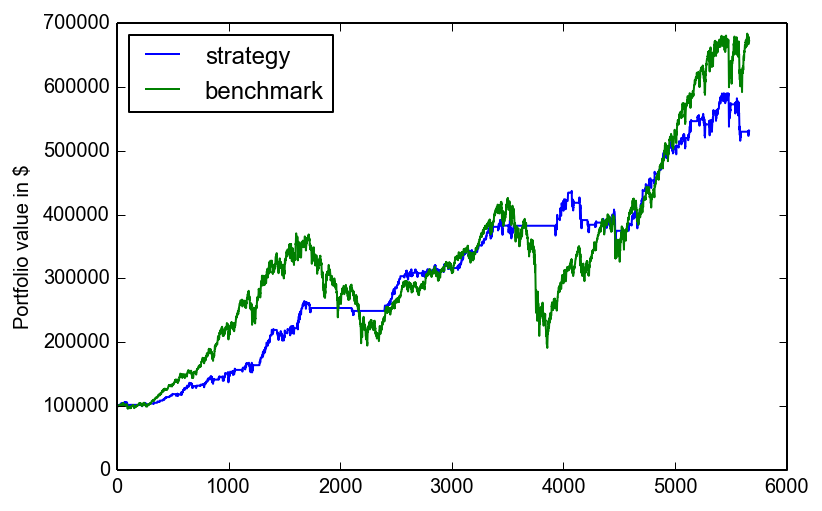

In [72]:
pf.plot_equity_curve(strategies['7'].dbal, benchmark=benchmark.dbal)